In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/Applications/anaconda3/envs/mude/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Trajectory per Particle

#### loading in the three different pieces for each total Trajectory

In [3]:
def Flip_dataframes(df):
    """Process the dataframe: Remove negative x values, normalize x, and make negative values positive."""
    # Remove rows where x values are negative
    df = df[df['x'] >= 0].copy()

    # Step 2: Subtract the first x value from all x values to set the first x value to 0
    first_x_value = df['x'].iloc[0]
    df['x'] = df['x'] - first_x_value

    # Step 3: Make all negative x values positive
    df['x'] = df['x'].abs()

    return df
run = 3
p = 1
H = 20
loc = ["B", "M", "E"]
# File paths
file_path_begin = f'/Volumes/CAMI_2/TRAJECTORIES/H{H}/RUN{run}/P{p}/H{H}_R{run}_P{p}_{loc[0]}.txt'
#file_path_middle = 'C:/Users/lswus/Documents/A_MasterThesis/Trajectory_data/Run_1/Run1_ball4/Run1_ball4_middle.txt'
#file_path_middle = f'/Volumes/CAMI_2/TRAJECTORIES/H{H}/RUN{run}/P{p}/H{H}_R{run}_P{p}_{loc[2]}.txt'


# Read and process the data
df_begin = pd.read_csv(file_path_begin, delimiter='\t', skiprows=1)
#df_middle = pd.read_csv(file_path_middle, delimiter='\t', skiprows=1)
#df_end = pd.read_csv(file_path_end, delimiter='\t', skiprows=1)


# Process the dataframes
df_begin = Flip_dataframes(df_begin)
#df_middle = Flip_dataframes(df_middle)
#df_end = Flip_dataframes(df_end)


# print(df_begin)
# print(df_middle)
# print(df_end)


#### Displaying the three original pieces of the trajectories of each particle

In [4]:
names_trajectory_pieces = [df_begin, df_middle]
#names_trajectory_pieces = [df_begin, df_middle, df_end]
names_title = ['Beginning part (thrown in)', 'End part (beaching)']
#names_title = ['Beginning part (thrown in)', 'middle part', 'End part (beaching)']
for i in range(0,2): 
    df = names_trajectory_pieces[i]
    # Extract the columns
    t = df['t']
    x = df['x']
    y = df['y']
    # display(df)

    # Create a (t, x) plot
    plt.figure(figsize=(8, 4))
    plt.subplot(3, 1, 1)
    plt.plot(t, x, label="x(t)", color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('x (m)')
    plt.title(f'{names_title[i]} (t, x) plot')
    plt.grid(True)

    # Create a (t, y) plot
    plt.subplot(3, 1, 2)
    plt.plot(t, y, label="y(t)", color='g')
    plt.xlabel('Time (s)')
    plt.ylabel('y (m)')
    plt.title(f'{names_title[i]} (t, y) Plot')
    plt.grid(True)

    # Create a (x, y) plot
    plt.subplot(3, 1, 3)
    plt.plot(x, y, label="y(x)", color='r')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(f'{names_title[i]} (x, y) Plot')
    plt.ylim(0, 0.8)  #
    plt.grid(True)
    plt.plot(x.iloc[0], y.iloc[0], 'b.', label='start')
    plt.plot(x.iloc[-1], y.iloc[-1], 'g.', label='end')
    plt.legend()

    print(f'The starting location of the particle is x = {(x.iloc[0]):.3f} m and y = {(y.iloc[0]):.3f} m at time is {(t.iloc[0]):.2f} seconds')
    print(f'The final location of the particle is x = {(x.iloc[-1]):.3f} m and y = {(y.iloc[-1]):.3f} m at time is {(t.iloc[-1]):.2f} seconds')
    print()
    print()
    # Show the plots
    plt.tight_layout()
    plt.show()



NameError: name 'df_middle' is not defined

In [19]:
# print(df_begin)
# print(df_middle)
# print(df_end)

#### Merging the dataframes to make one: 
We discard the one 'overlapping' row (the last of the first one overlaps in theory with the first of the second one) \
We then overwrite the time series for the second and third dataframe (and thus videos of locations 2 and 3) so that the time series is never interrupted. \
A warning is given if there is a big gap in time series to check if no errors are made

In [20]:
#Merging for when i onl

In [5]:
# # FOR CAMI: HERE TWO DATAFRAMES ARE MERGED, WHICH CAN BE USED FOR THE WAVECONDITIONS WERE ONLY THE FIRST TWO OVERLAP AND THEN THERE IS A GAP

def Merging(df_begin, df_middle):
#     # drop the 'overlapping' row: 
    df_middle = df_middle.drop(index=0).reset_index(drop=True)
    
#     # find the last x-value of the first dataframe (to be added to the x = 0 of the second dataframe) and add it
#     # so that our x axis continues
    last_x_value_df_begin = df_begin['x'].iloc[-1]
    df_middle['x'] = df_middle['x'] + last_x_value_df_begin
    
#     # this line gives a warning if the 'jump' in y values becomes to high
    if df_middle['y'].iloc[0] - df_begin['y'].iloc[-1] >= 0.02:
        print('WARNING: there is a jump in y-values larger that 2 cm between dataframes beginning and middle')
        print(f"The difference is equal to {(df_middle['y'].iloc[0] - df_begin['y'].iloc[-1])} m")
        
#     # this line gives a warning if the 'jump' 
    if df_middle['t'].iloc[0] - df_begin['t'].iloc[-1] >= 1:
        print('WARNING: there is a jump in time-values larger that 1 second between dataframes beginning and middle')
        print(f"The difference is equal to {(df_middle['t'].iloc[0] - df_begin['t'].iloc[-1])} seconds")
        
#     # here, the delta t is calculated. Then the time series is overwritten.      
    delta_t = df_begin['t'].iloc[1] - df_begin['t'].iloc[0]
    df_middle['t'] = df_middle['t'] + df_begin['t'].iloc[-1] + delta_t - df_middle['t'].iloc[0]
    
#     # here the dataframes are merged. 
    merged_df = pd.concat([df_begin, df_middle], ignore_index=True)
    
    
    return df_begin, df_middle, merged_df

Merging(df_begin, df_middle)


NameError: name 'df_middle' is not defined

In [22]:
df_ball1 = Merging(df_begin, df_middle)
df_ball1

The difference is equal to 0.022544974140881524 m


(              t         x         y
 0    108.316625  0.000000  0.405642
 1    108.400042  0.009452  0.408160
 2    108.483458  0.019543  0.414832
 3    108.566875  0.035586  0.415784
 4    108.650292  0.044962  0.418743
 ..          ...       ...       ...
 541  153.445042  2.480095  0.694174
 542  153.528458  2.476105  0.693787
 543  153.611875  2.476513  0.693601
 544  153.695292  2.488858  0.692661
 545  153.778708  2.511711  0.689186
 
 [546 rows x 3 columns],
               t         x         y
 0    153.862125  2.519765  0.711731
 1    153.945542  2.531206  0.711707
 2    154.028958  2.535594  0.710979
 3    154.112375  2.541314  0.710835
 4    154.195792  2.544421  0.709873
 ..          ...       ...       ...
 512  196.571458  2.952409  0.574328
 513  196.654875  2.952245  0.573919
 514  196.738292  2.951777  0.573590
 515  196.821708  2.948379  0.573607
 516  196.905125  2.944097  0.572844
 
 [517 rows x 3 columns],
                t         x         y
 0     108.316625  0

In [6]:
# HERE THREE DATAFRAMES ARE MERGED

def Merging(df_begin, df_middle, df_end):
    " Merging of the dataframes of the different parts of the trajectory of each particle"
    "Starting with Dataframes begin and middle"
    
    
    # drop the 'overlapping' row: 
    df_middle = df_middle.drop(index=0).reset_index(drop=True)
    
    # find the last x-value of the first dataframe (to be added to the x = 0 of the second dataframe) and add it
    # so that our x axis continues
    last_x_value_df_begin = df_begin['x'].iloc[-1]
    df_middle['x'] = df_middle['x'] + last_x_value_df_begin
    
    # this line gives a warning if the 'jump' in y values becomes to high
    if df_middle['y'].iloc[0] - df_begin['y'].iloc[-1] >= 0.02:
        print('WARNING: there is a jump in y-values larger that 2 cm between dataframes beginning and middle')
        print(f"The difference is equal to {(df_middle['y'].iloc[0] - df_begin['y'].iloc[-1])} m")
        
    # this line gives a warning if the 'jump' 
    if df_middle['t'].iloc[0] - df_begin['t'].iloc[-1] >= 0.5:
        print('WARNING: there is a jump in time-values larger that 1 second between dataframes beginning and middle')
        print(f"The difference is equal to {(df_middle['t'].iloc[0] - df_begin['t'].iloc[-1])} seconds")
        
    # here, the delta t is calculated. Then the time series is overwritten.      
    delta_t = df_begin['t'].iloc[1] - df_begin['t'].iloc[0]
    df_middle['t'] = df_middle['t'] + df_begin['t'].iloc[-1] + delta_t - df_middle['t'].iloc[0]
    
    # here the dataframes are merged. 
    merged_df_beginmiddle = pd.concat([df_begin, df_middle], ignore_index=True)
    
    
    
    
    "Now Adding dataframe End"
    
        # drop the 'overlapping' row: 
    df_end = df_end.drop(index=0).reset_index(drop=True)
    
    # find the last x-value of the first dataframe (to be added to the x = 0 of the second dataframe) and add it
    # so that our x axis continues
    last_x_value_df_merged_beginmiddle = merged_df_beginmiddle['x'].iloc[-1]
    df_end['x'] = df_end['x'] + last_x_value_df_merged_beginmiddle

    # this line gives a warning if the 'jump' in y values becomes to high
    if abs(df_end['y'].iloc[0] - merged_df_beginmiddle['y'].iloc[-1]) >= 0.02:
        print('WARNING: there is a jump in y-values larger that 2 cm between dataframes middle and end')
        print(f"The difference is equal to {(df_end['y'].iloc[0] - merged_df_beginmiddle['y'].iloc[-1])} m")
        
    # this line gives a warning if the 'jump' 
    if df_end['t'].iloc[0] - merged_df_beginmiddle['t'].iloc[-1] >= 0.5:
        print('WARNING: there is a jump in time-values larger that 1 second between dataframes middle and end')
        print(f"The difference is equal to {(df_end['t'].iloc[0] - merged_df_beginmiddle['t'].iloc[-1])} seconds")
        
    # here, the delta t is calculated. Then the time series is overwritten.      
    delta_t_2 = merged_df_beginmiddle['t'].iloc[1] - merged_df_beginmiddle['t'].iloc[0]
    df_end['t'] = df_end['t'] + merged_df_beginmiddle['t'].iloc[-1] + delta_t_2 - df_end['t'].iloc[0]
    
    # here the dataframes are merged. 
    merged_df = pd.concat([merged_df_beginmiddle, df_end], ignore_index=True)
    

    
    
    return merged_df

df_ball1 = Merging(df_begin, df_middle, df_end)

NameError: name 'df_middle' is not defined

The starting location of the particle is x = 0.000 m and y = 0.406 m at time is 108.32 seconds
The final location of the particle is x = 2.944 m and y = 0.573 m at time is 196.91 seconds


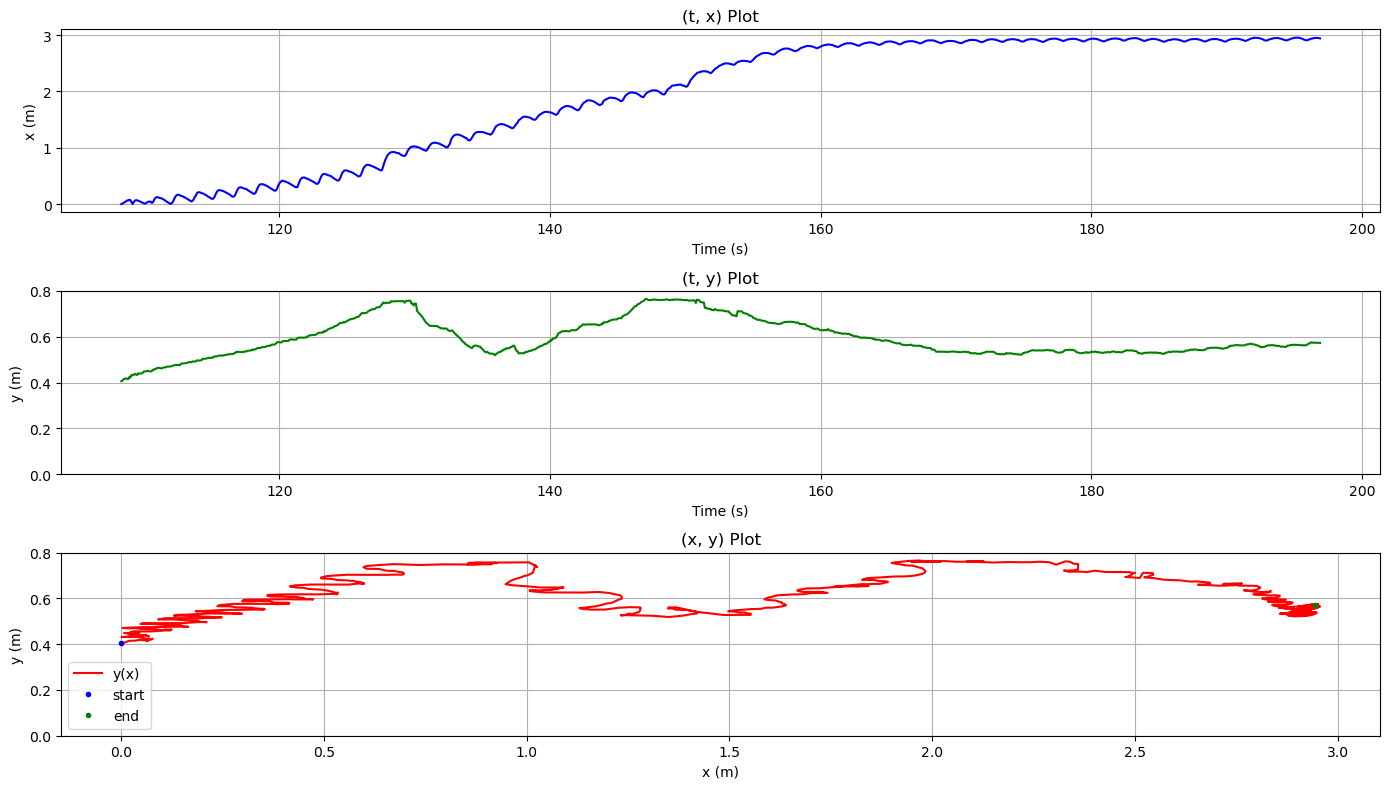

In [23]:

# Extract the columns
t = df_ball1[2]['t']
x = df_ball1[2]['x']
y = df_ball1[2]['y']
# display(df)

# Create a (t, x) plot
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)

plt.plot(t, x, label="x(t)", color='b')
plt.xlabel('Time (s)')
plt.ylabel('x (m)')
plt.title('(t, x) Plot')
plt.grid(True)

# Create a (t, y) plot
plt.subplot(3, 1, 2)
plt.plot(t, y, label="y(t)", color='g')
plt.xlabel('Time (s)')
plt.ylabel('y (m)')
plt.title('(t, y) Plot')
plt.ylim(0, 0.8)
plt.grid(True)

# Create a (x, y) plot
plt.subplot(3, 1, 3)
plt.plot(x, y, label="y(x)", color='r')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('(x, y) Plot')
plt.ylim(0, 0.8)
plt.grid(True)
plt.plot(x.iloc[0], y.iloc[0], 'b.', label='start')
plt.plot(x.iloc[-1], y.iloc[-1], 'g.', label='end')

plt.legend()

print(f'The starting location of the particle is x = {(x.iloc[0]):.3f} m and y = {(y.iloc[0]):.3f} m at time is {(t.iloc[0]):.2f} seconds')
print(f'The final location of the particle is x = {(x.iloc[-1]):.3f} m and y = {(y.iloc[-1]):.3f} m at time is {(t.iloc[-1]):.2f} seconds')

# Show the plots
plt.tight_layout()
plt.show()

In [17]:
# ####### For Run1_ball2 There is a 3 cm jump between beginning and middle and 3.5 betweeen middle and end

# #### Beginning - End (3 cm): 
# x = df_ball1['x'][165:172]
# y = df_ball1['y'][165:172]
# # display(df)

# # Create a (t, x) plot
# plt.figure(figsize=(14, 8))
# # Create a (t, y) plot

# plt.plot(t, y, label="y(t)", color='g', marker='.')
# plt.xlabel('Time (s)')
# plt.ylabel('y (m)')
# plt.title('(t, y) Plot')
# plt.grid(True)


In [18]:
# # between middle and end (3.5 cm)
# t = df_ball1['t'][285:291]
# x = df_ball1['x'][285:291]
# y = df_ball1['y'][285:291]
# # display(df)

# # Create a (t, x) plot
# plt.figure(figsize=(14, 8))
# # Create a (t, y) plot

# plt.plot(t, y, label="y(t)", color='g', marker='.')
# plt.xlabel('Time (s)')
# plt.ylabel('y (m)')
# plt.title('(t, y) Plot')
# plt.ylim(0, 0.8)
# plt.grid(True)